In [1]:
using Plots
using FFTW
using JLD

In [2]:
Z_r_list = load("polytrope.jld")["Z_r"];
time_list = load("polytrope.jld")["time"];
r_f = load("polytrope.jld")["Radius at faces"];
r_c = load("polytrope.jld")["Radius at centers"];
delta_t = load("polytrope.jld")["delta_t"];
omega= load("omega.jld")["omega_list"];

801-element Vector{Float64}:
     2.5413970361597986
     3.87103069700322
     5.126273261135494
     6.353726097328241
     7.56716856539773
     8.77238382577298
     9.972225439705952
    11.168219748593755
    12.361192699037867
    13.551543854924986
    14.739366467840176
    15.924484625581522
    17.106429583415377
     ⋮
  1115.6355338771325
  1117.4679665873773
  1119.3055436462948
  1121.1495240762831
  1123.001946078022
  1124.8664566184289
  1126.7506676989256
  1128.6754753434261
  1130.7580021245412
  1244.180431825127
 99875.23388778444
 99999.99999999997

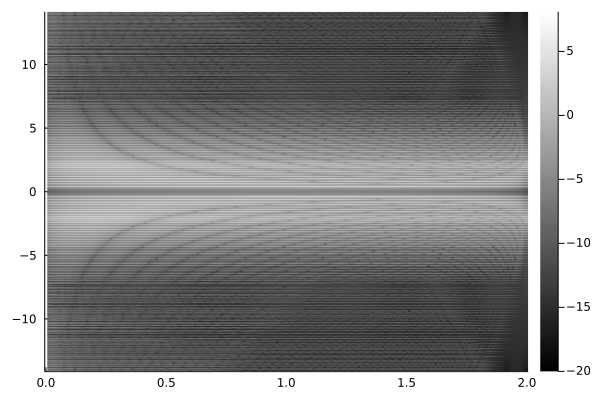

In [3]:
#FFT Code starts her
freqs=fftfreq(length(Z_r_list),1.0/(time_list[2]-time_list[1])) |> fftshift
B = zeros(length(Z_r_list),length(r_f))
signal = zeros(length(Z_r_list))
for i = 1:length(r_f)
    for j = 1:length(Z_r_list)
        signal[j] = Z_r_list[j][i]
    end
    x = collect(0:length(Z_r_list)-1)/(length(Z_r_list)-1) .- 0.5
    win=cos.(pi*x).^2
    F = fft(signal.*win) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[j,i]=log10(abs(F[j]))
    end
end
#Plotting FFT code starts here
heatmap(r_f[:],(freqs),B,c=cgrad([:black,:white]))

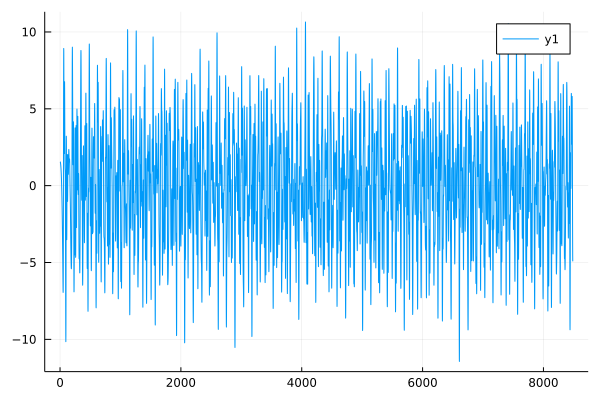

In [4]:
signal = zeros(length(Z_r_list))
for j = 1:length(Z_r_list)
    signal[j] = Z_r_list[j][100]
end
plot(signal)

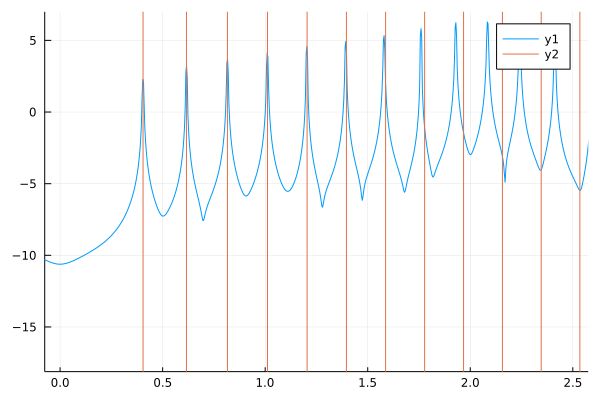

In [5]:
plot(freqs,B[:,end],xaxis = range =[0,2.5])
vline!(omega/(2pi))

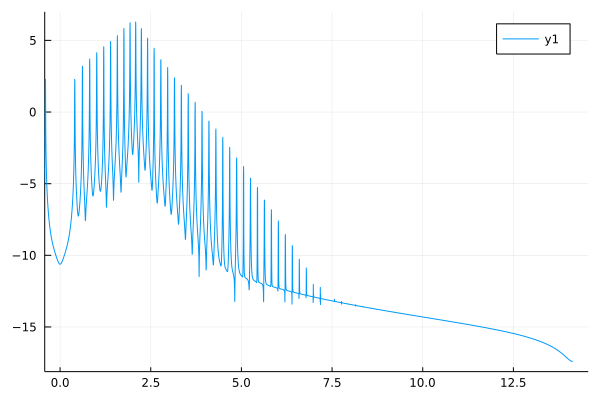

In [48]:
plot(freqs,B[:,end],xaxis = range =[0,maximum(freqs)])